In [1]:
from torchvision.utils import make_grid
import torch
import glob
from IPython import display
import torchvision
import PIL
from PIL import Image
import re
from IPython.core.display import HTML

from collections import defaultdict

/home/ubuntu/projects/AiArt/.venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# !ln -s /home/ubuntu/experiments experiments
# !ln -s /home/ubuntu/projects/AiArt/data data

# Training Data

In [3]:
o = glob.glob('experiments/v5_style_pp_1__te_0/class_data/*')
    
html = ''
for img in o[:10]:
    html += f"""
    <img src="{img}" style='float:left; width:200px'>
    """
html += '<hr style="clear:both">'
HTML(html)

In [4]:
o = glob.glob('data/v2_280/*')
    
html = ''
i=0
for img in o[i:i+10]:
    html += f"""
    <img src="{img}" style='float:left; width:200px'>
    """
html += '<hr style="clear:both">'
HTML(html)

# Samples

In [5]:
o = glob.glob('experiments/v5_style_pp_1__te_0/*/samples/*')
imgs = defaultdict(list)
for x in o:
    step, img = re.search(f'.*/(.+?)/samples/(.+?)',x).groups() 
    imgs[int(step)].append(x)

In [6]:
html = ''
for step in sorted(imgs.keys()):
    html += f'step={step}'
    for img in imgs[step]:
        html += f"""
        <img src="{img}" style='float:left; width:200px'>
        """
    html += '<hr style="clear:both">'
HTML(html)

# Convert

In [7]:
!find logs2 -name "*model.ckpt*"

find: ‘logs2’: No such file or directory


In [7]:
#@markdown Specify the weights directory to use (leave blank for latest)
WEIGHTS_DIR = "experiments/v5_style_pp_1__te_0/22400//" #@param {type:"string"}
# WEIGHTS_DIR = "experiments/v3/1900//" #@param {type:"string"}
# if WEIGHTS_DIR == "":
#     from natsort import natsorted
#     from glob import glob
#     import os
#     WEIGHTS_DIR = natsorted(glob(OUTPUT_DIR + os.sep + "*"))[-1]
print(f"[*] WEIGHTS_DIR={WEIGHTS_DIR}")

[*] WEIGHTS_DIR=experiments/v5_style_pp_1__te_0/22400//


In [8]:
#@markdown Run conversion.
ckpt_path = WEIGHTS_DIR + "/model.ckpt"

half_arg = ""
#@markdown  Whether to convert to fp16, takes half the space (2GB).
fp16 = True #@param {type: "boolean"}
if fp16:
    half_arg = "--half"
!python ../aiart/convert_diffusers_to_original_stable_diffusion.py --model_path {WEIGHTS_DIR}  --checkpoint_path {ckpt_path} {half_arg}
print(f"[*] Converted ckpt saved at {ckpt_path}")

Reshaping encoder.mid.attn_1.q.weight for SD format
Reshaping encoder.mid.attn_1.k.weight for SD format
Reshaping encoder.mid.attn_1.v.weight for SD format
Reshaping encoder.mid.attn_1.proj_out.weight for SD format
Reshaping decoder.mid.attn_1.q.weight for SD format
Reshaping decoder.mid.attn_1.k.weight for SD format
Reshaping decoder.mid.attn_1.v.weight for SD format
Reshaping decoder.mid.attn_1.proj_out.weight for SD format
[*] Converted ckpt saved at experiments/v5_style_pp_1__te_0/22400///model.ckpt


In [9]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline, DDIMScheduler
from IPython.display import display

model_path = WEIGHTS_DIR             # If you want to use previously trained model saved in gdrive, replace this with the full path of model in gdrive

scheduler = DDIMScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", clip_sample=False, set_alpha_to_one=False)
pipe = StableDiffusionPipeline.from_pretrained(model_path, scheduler=scheduler, safety_checker=None, torch_dtype=torch.float16).to("cuda")

g_cuda = None

/home/ubuntu/projects/AiArt/.venv/lib/python3.8/site-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:101: FutureWarning: The configuration file of this scheduler: DDIMScheduler {
  "_class_name": "DDIMScheduler",
  "_diffusers_version": "0.11.1",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "clip_sample": false,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "set_alpha_to_one": false,
  "steps_offset": 0,
  "trained_betas": null
}
 is outdated. `steps_offset` should be set to 1 instead of 0. Please make sure to update the config accordingly as leaving `steps_offset` might led to incorrect results in future versions. If you have downloaded this checkpoint from the Hugging Face Hub, it would be very nice if you could open a Pull request for the `scheduler/scheduler_config.json` file
  deprecate("steps_offset!=1", "1.0.0", deprecation_message, standard_warn=False)
You have disabled the safety checker for <

In [10]:
#@markdown Can set random seed here for reproducibility.
g_cuda = torch.Generator(device='cuda')
seed = 52362 #@param {type:"number"}


In [11]:
prompts = ''
'koyoharu gotouge'
'Quantic Dream'

'Quantic Dream'

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:07<00:00,  6.66it/s]


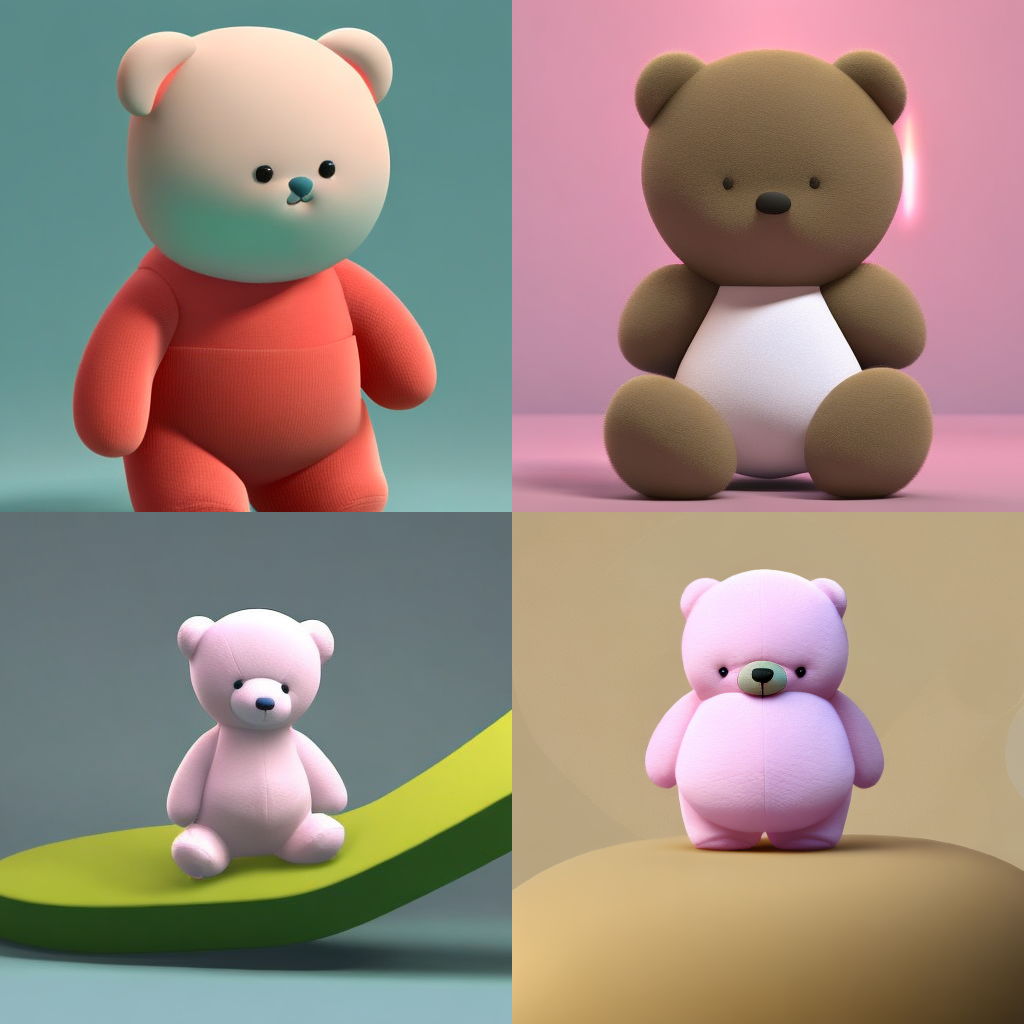

In [27]:
#@title Run for generating images.

#negative_prompt = "bad anatomy, bw, black and white, ugly, tiling, poorly drawn hands, poorly drawn feet, poorly drawn face, out of frame, extra limbs, disfigured, deformed, body out of frame, blurred" #@param {type:"string"}
# prompt = "3dCartoonArt style, Tiny cute isometric cheeseburger, soft smooth lighting, soft colors, 100mm, 3d Pixar art, trending on polycount, white background, physically based rendering, centered" #@param {type:"string"}
prompt="Tiny, Cute, Isometric, A teddy bear, Soft smooth lighting, Soft color palette, 100mm, 3d Pixar art, Trending on Polycount, White background, Physically based rendering, Centered"
# prompt = "a pony in the style of secourses" #@param {type:"string"}
negative_prompt = "ugly, deformed, bad anatomy, draft, blurry, ugly, black and white, out of frame, grid, grainy, tiling, out of frame, disfigured, signature"
# negative_prompt=""
num_samples = 4 #@param {type:"number"}
guidance_scale = 7.5 #@param {type:"number"}
num_inference_steps = 50 #@param {type:"number"}
height = 512 #@param {type:"number"}
width = 512 #@param {type:"number"}

with autocast("cuda"), torch.inference_mode():
    images = pipe(
        prompt,
        height=height,
        width=width,
        negative_prompt=negative_prompt,
        num_images_per_prompt=num_samples,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale,
        generator=g_cuda
    ).images

images[0]
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid
image_grid(images, 2,2)